In [2]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [3]:
target1 = pd.read_csv('J074606.63+364544.4.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

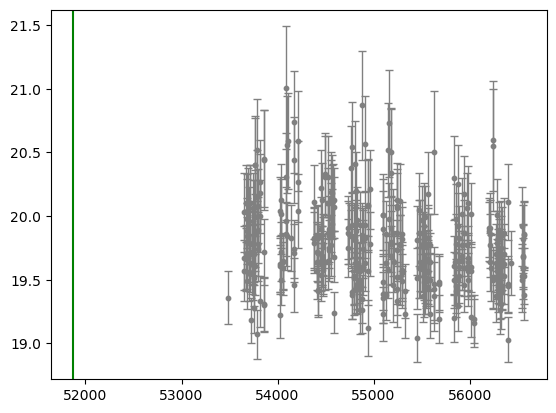

In [4]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x=	51873 , color ='g')	
#plt.axvline(x= , color ='g')	

In [5]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

371

In [6]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[167.2879299999986,
 0.016390000004321337,
 0.00819000000046799,
 24.894359999998414,
 0.005929999999352731,
 0.011890000001585577,
 6.018479999998817,
 0.015729999999166466,
 7.023720000004687,
 0.9825099999943632,
 0.006489999999757856,
 0.006580000001122244,
 0.006670000002486631,
 1.8918100000009872,
 19.03016999999818,
 0.03246000000217464,
 5.9034800000008545,
 0.007019999997282866,
 0.014069999997445848,
 13.06260000000475,
 8.860599999999977,
 0.007449999997334089,
 0.007429999997839332,
 0.007450000004610047,
 6.980539999996836,
 0.006520000002637971,
 0.006519999995362014,
 0.006570000005012844,
 16.049699999995937,
 0.007539999998698477,
 0.007490000003599562,
 0.007480000000214204,
 4.840620000002673,
 0.006599999993341044,
 0.01464000000123633,
 7.9331400000010035,
 0.007810000002791639,
 0.00781999999890104,
 0.007850000001781154,
 17.94720999999845,
 0.013390000000072177,
 0.006569999997736886,
 9.082760000004782,
 0.008379999999306165,
 0.007999999994353857,
 0.00812000

In [7]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

9


[0, 55, 82, 131, 183, 226, 269, 308, 359]

In [44]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[1, 55, 27, 49, 52, 43, 43, 39, 51, 12]

In [30]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length ]

In [31]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
0,J074606.63+364544.4,1138034002250,19.36,0.21,116.52779,36.76210,53479.18182,0
19,J074606.63+364544.4,1138034002250,19.57,0.24,116.52744,36.76197,53646.46975,0
20,J074606.63+364544.4,1138034002250,20.03,0.31,116.52720,36.76228,53646.48614,0
21,J074606.63+364544.4,1138034002250,19.67,0.25,116.52721,36.76225,53646.49433,0
22,J074606.63+364544.4,1138034002250,19.68,0.25,116.52766,36.76252,53671.38869,0
...,...,...,...,...,...,...,...,...
366,J074606.63+364544.4,1138034002250,19.82,0.27,116.52742,36.76212,56552.48548,0
367,J074606.63+364544.4,1138034002250,19.85,0.26,116.52749,36.76237,56567.48392,0
368,J074606.63+364544.4,1138034002250,19.86,0.26,116.52762,36.76258,56567.49128,0
369,J074606.63+364544.4,1138034002250,19.53,0.22,116.52768,36.76238,56567.49868,0


In [32]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53861.17609

In [45]:
df_2 = data.iloc[:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

54209.14939

In [46]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54586.16573

In [47]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54964.1637

In [48]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55325.14798

In [49]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55681.17223

In [50]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

56044.19237

In [51]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56399.16274

In [52]:
df_9 = data.iloc[seppt[7]+1:seppt[8],:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56567.50604

In [43]:
df_10 = data.iloc[seppt[8]+1:,:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

IndexError: list index out of range

In [ ]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [ ]:
g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [53]:
med = []
centerMJD = []
medMJD = []
medopflux = []



g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [23]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

In [ ]:


g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [54]:
med

[19.8, 19.85, 19.805, 19.81, 19.77, 19.63, 19.64, 19.625]

In [55]:
centerMJD

[53740.65679218182,
 54096.14785653846,
 54483.746343541665,
 54840.582156470584,
 55200.20514714286,
 55545.09118642857,
 55924.55495447368,
 56301.5938606]

In [56]:
medMJD


[53741.28481,
 54089.326385,
 54476.30129,
 54831.43057,
 55195.79309,
 55538.877495,
 55920.331695,
 56307.245085]

In [57]:
medopflux


[4.3651583224016295e-05,
 4.1688706518730196e-05,
 4.345516919519945e-05,
 4.325138310350115e-05,
 4.487453899331295e-05,
 5.105049999754044e-05,
 5.058246620031107e-05,
 5.1286682227858025e-05]

In [59]:
st = 53479
#start of observations

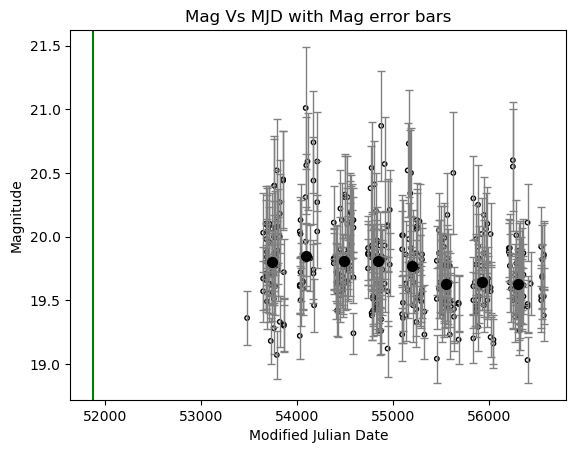

In [60]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 	51873 , color ='g')	
#plt.axvline(x=  , color ='g')	

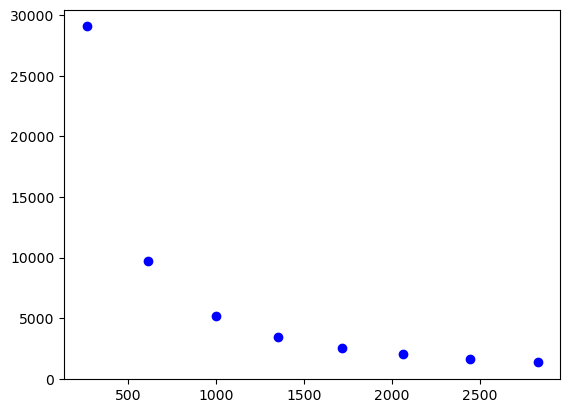

In [61]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [62]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [63]:
popt3

array([-1.34842069e-07,  1.81212062e+00,  1.98388800e+01])

In [64]:
pcov3

array([[ 1.07911219e-12,  9.98524522e-07, -3.46564629e-08],
       [ 9.98524522e-07,  9.24586494e-01, -3.15969941e-02],
       [-3.46564629e-08, -3.15969941e-02,  1.72128665e-03]])

In [65]:
 np.sqrt(np.diag(pcov3))

array([1.03880325e-06, 9.61554208e-01, 4.14883918e-02])

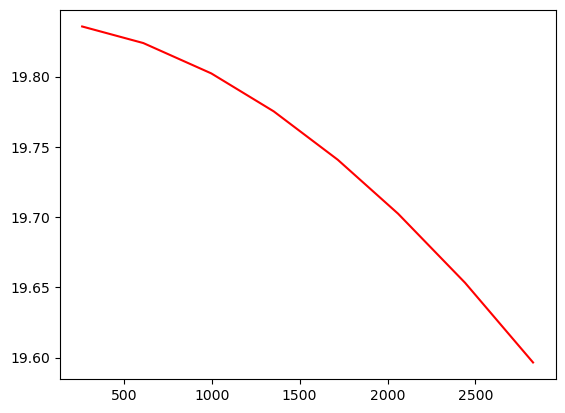

In [66]:
plt.plot(x, f(x,*popt3), 'r-')

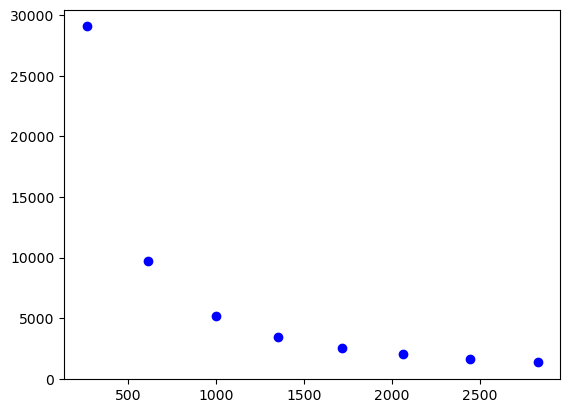

In [67]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [68]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [69]:
popt4

array([-1.88538867e-06,  1.47821137e+00,  1.98750681e+01])

In [70]:
pcov4

array([[ 1.56062600e-10,  1.01175639e-05, -5.12905968e-07],
       [ 1.01175639e-05,  6.56550896e-01, -3.27101405e-02],
       [-5.12905968e-07, -3.27101405e-02,  2.42469085e-03]])

In [71]:
 np.sqrt(np.diag(pcov4))

array([1.24925018e-05, 8.10278283e-01, 4.92411500e-02])

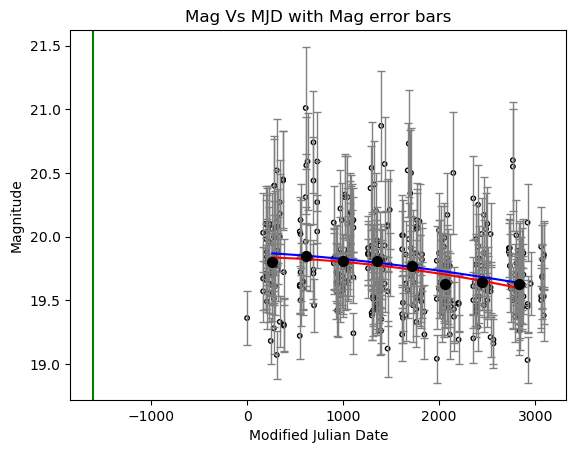

In [72]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 	51873 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



Text(0.5, 1.0, 'Flux Density Vs MJD with Flux error bars')

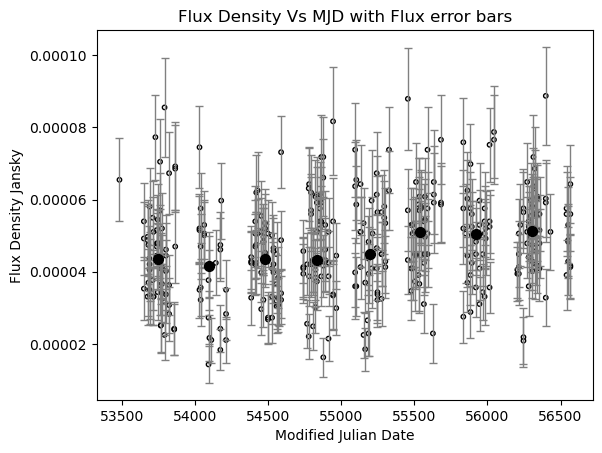

In [74]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

#plt.axvline(x=  , color ='g')	
#plt.axvline(x= , color ='g')

In [75]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [76]:
popt2

array([4.78301245e-12, 1.83655561e+00, 4.20555412e-05])

In [77]:
pcov2

array([[ 1.36941070e-21, -3.58374380e-11, -5.23198905e-17],
       [-3.58374380e-11,  9.38493977e-01,  1.34911756e-06],
       [-5.23198905e-17,  1.34911756e-06,  3.11541544e-12]])

In [78]:
 np.sqrt(np.diag(pcov2))

array([3.70055496e-11, 9.68758988e-01, 1.76505395e-06])

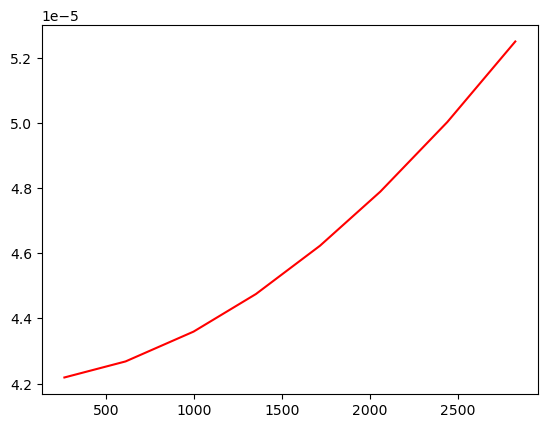

In [79]:
plt.plot(x, f(x,*popt2), 'r-')

In [80]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [81]:
popt1

array([9.70854517e-11, 1.44262072e+00, 4.27172088e-05])

In [82]:
pcov1

array([[ 4.33855709e-19, -5.47159792e-10, -1.11940530e-15],
       [-5.47159792e-10,  6.90734426e-01,  1.38871817e-06],
       [-1.11940530e-15,  1.38871817e-06,  4.10735380e-12]])

In [83]:
 np.sqrt(np.diag(pcov1))

array([6.58677242e-10, 8.31104341e-01, 2.02666075e-06])

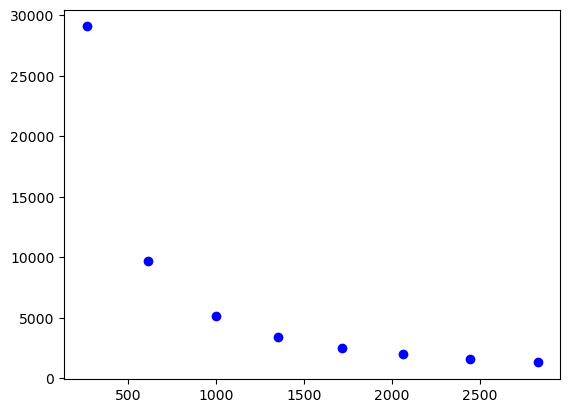

In [84]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


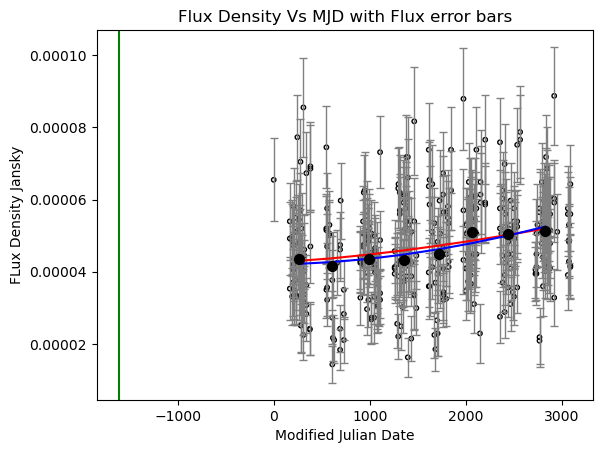

In [88]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 	51873 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [ ]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [ ]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
